# 1.0 Introdução

O documento presente tem por objetivo viabilizar a criação de uma solução capaz de analisar, filtrar e classificar dados de pacientes com câncer a fim de identificar a variabilidade da evolução da doença, bem como as possíveis respostas a tratamentos já implantados, para, assim, detectar padrões que indiquem aos profissionais de saúde uma possível estimativa de risco e grau de sobrevida de um paciente.

## 1.1 Configurações iniciais

Importando as bibliotecas necessárias à manipulação do banco de dados:

In [ ]:
# Importando as bibliotecas necessárias à manipulação do banco de dados.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definindo a quantidade máxima de colunas como indeterminada.
pd.set_option('display.max_columns', None)

Para que este notebook funcione corretamente, é necessário, primeiramente, fazer o upload do banco de dados nos arquivos do caderno. Observação: atente-se para que o arquivo esteja no formato .XLSX (EXCEL). Assim que fizer isso, digite o nome do arquivo na célula abaixo e a execute.

In [ ]:
#@title Caminho do arquivo de banco de dados

# Lendo o banco de dados a partir da planilha recebida.

file_path = "/content/database.xlsx" #@param {type:"string"}"

table = pd.read_excel(file_path)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

A fim de eliminar, logo de início, todas as colunas que não possuem ao menos um dado, executa-se:

In [ ]:
# Limpando todas as colunas que possuem todos os seus valores vazios.
table.dropna(how='all', axis=1, inplace=True)

E, com objetivo de validar se tudo ocorreu bem, exibe-se a tabela abaixo:

In [ ]:
# Imprimindo os quatro primeiros registros da tabela.
table.head()

,record_id,redcap_repeat_instrument,redcap_repeat_instance,dob,escolari,level_education,race,pregnancy_history,partos,abortion,breast_feeding,breast_feeding_time,menarche,period,bmi,contraceptive_method___1,contraceptive_method___2,contraceptive_method___3,contraceptive_method___4,contraceptive_method___999,contraceptive,hormone_therapy,hormone_therapy_tasy,tempo_rep_hormo,tempo_rep_hormo_tasy,antec_fam_cancer_mama,tobaco,alcohol,tobaco_type,alcohol_type___1,alcohol_type___2,alcohol_type___3,family_cancer,familial_degree___1,familial_degree___2,familial_degree___3,family_cancer_id___1,family_cancer_id___2,family_cancer_id___3,family_cancer_id___4,family_cancer_id___5,family_cancer_id___6,mother_tumor,sister_n,daughter_n,sister_tumor_1,daughter_tumor_1,birads,benign,primary_diganosis,diff_tubular,nuclear_grade,mitotic_index,histological_grade,grau_hist,multicentricidade,multifocal,tumor_margin,er_ihc,pr_ihc,tumor_subtype,progesteron_perct,er_percentage,her2_ihc,her2_fish,ki67_perc,date_last_fu,follow_up_days,ultinfo,recidive,dtrecidiva,follow_up_days_recidive,reclocal,recregio,recdist,rec01,rec02,rec03,rec04,trathosp,topo,basediag,desctopo,morfo,descmorfo,tumor_stage,t,n,m,meta01,meta02,meta03,meta04,treatment,chemotherapy,tipo_qt_neo_her2,radioterapia,hormone_therapy_yn,seguim_qt_realizou,seguim_qt,data_2,weight,height
0,54,NaN,NaN,1948-03-28,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,3585.0,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,54,registro_de_tumores,2.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1.0,2011-03-10,1338.0,1.0,1.0,0.0,50,NaN,NaN,NaN,9.0,509.0,3.0,MAMA SOE (EXCLUI PELE DA MAMA C44.5),85003.0,CARCINOMA DUCTAL INFILTRANTE SOE,10.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,54,registro_de_tumores,3.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,445.0,3.0,PELE DO TRONCO,88211.0,FIBROMATOSE AGRESSIVA,99.0,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,54,dados_histopatologicos_mama,2.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,80,80,1.0,5.0,10.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,54,dados_histopatologicos_mama,3.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,100,80,1.0,5.0,20.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


# 2.0 Manipulação dos dados

## 2.1 Premissas de priorização, escolha de colunas de maior relevância e etiquetamento

Com o intuito de facilitar a construção de um modelo preditivo com assertividade relevante, algumas colunas de dados foram priorizadas em detrimento de outras. A premissa utilizada para a escolha dessas colunas baseia-se em dois principais motivos:

1. A relevância conhecida dos dados (o quanto as informações presentes nas colunas são importantes para a evolução da doença); e
2. A expressividade dos dados (quantas tuplas foram, para determinada coluna, preenchidas de maneira satisfatória).

Com base nisso, e com o objetivo de promover a compreensão total dos dados, foram realizados tratamentos de etiquetamento e dicionarização das colunas. Por etiquetamento entende-se modificações e ajustes nos nomes das colunas. Dito isso, exibe-se abaixo a relação das features adotadas e seus produtos:

| Nome da coluna          | Etiquetamento                          | Conteúdo                                                                                                     | Justificativa                                                                                                                     |   |
|-------------------------|----------------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|---|
| record_id               | patient_id                             | número de identificação                                                                                      | é necessário distinguir uma paciente de outra                                                                                     |   |
| dob                     | date_of_birth                          | data de nascimento                                                                                           | pode ser útil para identificar padrões relativos à idade                                                                          |   |
| race                    | race                                   | raça                                                                                                         | pode ser útil para distinguir uma possível reação diferente à doença                                                              |   |
| pregnancy_history       | has_children                           | histórico de gravidez (se teve filhos ou não)                                                                | pode ser útil para entender a influência ou não da gravidez sobre o câncer                                                        |   |
| partos                  | number_of_births                       | quantidade de partos concebidos                                                                              | é necessário para avaliar o impacto da quantidade de partos e a progressão da doença                                              |   |
| abortion                | abortion                               | histórico abortivo (se sofreu abortos ou não)                                                                | é necessário para avaliar o impacto entre abortos e a progressão do câncer                                                        |   |
| breast_feeding          | has_breastfed                          | histórico de amamentação (se já amamentou ou não)                                                            | pode ser útil para entender o impacto da amamentação e a progressão da doença                                                     |   |
| breast_feeding_time     | breastfed_time                         | período de tempo pelo qual amamentou (em meses)                                                              | é necessário para entender a influência do tempo de amamentação sobre o desenvolvimento do câncer                                 |   |
| menarche                | menarche_age                           | menarca (idade, em anos, da primeira menstruação)                                                            | é necessário para entender a influência da idade da primeira menstrução sobre o desenvolvimento da doença                         |   |
| period                  | menopause_status                       | status da menopausa                                                                                          | pode ser útil para entender se existe alguma relação entre o status da menopausa e o desenvolvimento do câncer                    |   |
| bmi                     | body_mass_index                        | IMC medido (índice de massa corporal)                                                                        | pode ser útil para entender se existe alguma relação entre o índice de massa corporal e o desenvolvimento da doença               |   |
| hormone_therapy         | hormone_therapy_status                 | histórico de terapia hormonal (se fez terapia de reposição hormonal ou não)                                  | é necessário para entender a influência da terapia de reposição hormonal sobre o desenvolvimento do câncer                        |   |
| tempo_rep_hormo         | hormone_therapy_time                   | tempo de terapia de reposição hormonal (em anos)                                                             | pode ser útil para entender se existe alguma relação entre o tempo de terapia de reposição hormonal e o desenvolvimento da doença |   |
| antec_fam_cancer_mama   | has_breast_cancer_family_history       | histórico de câncer de mama na familia (se tem parentes com câncer ou não)                                   | pode ser útil para entender o impacto genético sobre o desenvolvimento do câncer                                                  |   |
| tobaco                  | tobaco                                 | histórico de fumo (se fez o uso de tabaco ou não)                                                            | é necessário para entender a influência do consumo de tabaco sobre o desenvolvimento da doença                                    |   |
| alcohol                 | alcohol                                | histórico de bebidas alcóolicas (se fez uso de bebida alcóolica ou não)                                      | é necessário para entender a influência do consumo de álcool sobre o desenvolvimento do câncer                                    |   |
| benign                  | is_benign                              | tipo do tumor (se é benigno ou maligno)                                                                      | é necessário para entender a correlação entre pessoas com tumores benignos ou malignos e o desenvolvimento da doença              |   |
| primary_diganosis       | primary_diagnostic                     | diagnóstico primário (tipo histológico)                                                                      | é necessário para entender a correlação entre o primeiro diagnótico dado e o desenvolvimento do câncer                            |   |
| diff_tubular            | tubular_differentiation                | diferenciação tubular ou grau arquitetural                                                                   | é necessário para entender características biomorfológicas do câncer                                                              |   |
| mitotic_index           | mitotic_index                          | índice mitótico (medida da rapidez com que as células cancerígenas crescem e se dividem).                    | é necessário para entender características biomorfológicas do câncer                                                              |   |
| histological_grade      | histological_grade                     | grau histológico (o quão diferente a arquitetura do tecido tumoral está em relação ao tecido mamário normal) |  é necessário para entender características biomorfológicas do câncer                                                             |   |
| grau_hist               | histological_grade_based_on_nottinghan | grau histológico baseado em Nottinghan                                                                       |  é necessário para entender características biomorfológicas do câncer                                                             |   |
| tumor_subtype           | tumor_subtype                          | subtipo tumoral                                                                                              | é necessário para entender a correlação existente entre o subtipo do câncer a evolução da doença                                  |   |
| progesteron_perct     | progesteron_percentage                 | receptor de progesterona (quantificação  em %)                                                               | é necessário para entender a correlação entre os índices de receptores de progesterona no corpo e a evolução do câncer            |   |
| date_last_fu            | date_of_last_patient_information       | data da última informação sobre o paciente                                                                   | pode ser útil para entender a validade da última informação do paciente conhecida                                                 |   |
| follow_up_days | days_since_the_last_tumor              | tempo desde o diagnóstico até a primeira recidiva                                                            | pode ser útil para estabelecer a correlação entre o diagnóstico e status do cancer com uma possível recidiva                      |   |
| ultinfo                 | last_known_patient_status              | última informação do paciente                                                                                | é necessário para caracterizar o último estado conhecido do paciente                                                              |   |
| recidive                | ricidive_status                        | histórico de recidiva (se sofreu recidiva ou não)                                                            | é necessário para estabelecer a correlação entre uma possível recidiva e a evolução da doença                                     |   |
| dtrecidiva              | recidive_date                          | data de recidiva (se houver)                                                                                 | é necessário para estebelecer um período médio de tempo até uma possível recidiva                                                 |   |
| follow_up_days_recidive | days_until_recidive                    | tempo desde o diagnóstico até a primeira recidiva (em dias)                                                  | é necessário para estebelecer um período médio de tempo até uma possível recidiva                                                 |   |
| data_2                  | exam_date                              | data da consulta                                                                                             | é necessário para criar correlações baseadas em tempo da evolução do câncer                                                       |   |
| weight                  | weight                                 | peso                                                                                                         | pode ser útil para estabelecer possíveis correlações entre o peso e a evolução da doença                                          |   |
| height                  | height                                 | altura                                                                                                       | pode ser útil para estabelecer possíveis correlações entre a altura e a evolução do câncer                                        |   |

## 2.2 Selecionando apenas as colunas desejadas

Dadas as colunas expostas no tópico anterior, cria-se um conjunto de dados com apenas as features desejadas, tal que:

In [ ]:
# Sobrescrevendo a tabela com apenas as colunas desejadas.
table = table[['record_id', 'dob', 'race','pregnancy_history','partos','abortion','breast_feeding','breast_feeding_time','menarche','period','bmi','hormone_therapy','tempo_rep_hormo','antec_fam_cancer_mama','tobaco','alcohol','benign','primary_diganosis','diff_tubular','mitotic_index','histological_grade','grau_hist','tumor_subtype','progesteron_perct','date_last_fu','follow_up_days','ultinfo','recidive','dtrecidiva','follow_up_days_recidive','data_2','weight','height']].copy()

# Renomeando as colunas de acordo com o etiquetamento feito.
table = table.rename(columns={'record_id': 'patient_id',
                              'dob': 'date_of_birth', 
                              'race':'race',
                              'pregnancy_history':'has_children',
                              'partos':'number_of_births',
                              'abortion':'abortion',
                              'breast_feeding':'has_breastfed',
                              'breast_feeding_time':'breastfed_time',
                              'menarche':'menarche_age',
                              'period':'menopause_status',
                              'bmi':'body_mass_index',
                              'hormone_therapy':'hormone_therapy_status',
                              'tempo_rep_hormo':'hormone_therapy_time',
                              'antec_fam_cancer_mama':'has_breast_cancer_family_history',
                              'tobaco':'tobaco',
                              'alcohol':'alcohol',
                              'benign':'is_benign',
                              'primary_diganosis':'primary_diagnostic',
                              'diff_tubular':'tubular_differentiation',
                              'mitotic_index':'mitotic_index',
                              'histological_grade':'histological_grade',
                              'grau_hist':'histological_grade_based_on_nottinghan',
                              'tumor_subtype':'tumor_subtype',
                              'progesteron_perct':'progesteron_percentage',
                              'date_last_fu':'date_of_last_patient_information',
                              'follow_up_days':'days_since_the_last_tumor',
                              'ultinfo':'last_known_patient_status',
                              'recidive':'ricidive_status',
                              'dtrecidiva':'recidive_date',
                              'follow_up_days_recidive':'days_until_recidive',
                              'data_2':'exam_date',
                              'weight':'weight',
                              'height':'height'})


In [ ]:
# Imprimindo os cinco primeiros registros com os nomes das coluna atualizados.
table.head()

,patient_id,date_of_birth,race,has_children,number_of_births,abortion,has_breastfed,breastfed_time,menarche_age,menopause_status,body_mass_index,hormone_therapy_status,hormone_therapy_time,has_breast_cancer_family_history,tobaco,alcohol,is_benign,primary_diagnostic,tubular_differentiation,mitotic_index,histological_grade,histological_grade_based_on_nottinghan,tumor_subtype,progesteron_percentage,date_of_last_patient_information,days_since_the_last_tumor,last_known_patient_status,ricidive_status,recidive_date,days_until_recidive,exam_date,weight,height
0,54,1948-03-28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,3585.0,2.0,NaN,NaT,NaN,NaT,NaN,NaN
1,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1.0,2011-03-10,1338.0,NaT,NaN,NaN
2,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
3,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,1.0,80,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
4,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,3.0,NaN,2.0,100,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN


## 2.3 Criando uma lista com pacientes únicos

Dado o escopo da aplicação, faz-se necessário, visando realizar manipulações futuras, por meio de números de identificações (ID's), obter uma lista com todos os pacientes únicos:



In [ ]:
# Criando um vetor com todos os números de identificação únicos de cada paciente.
unique_patient_ids = table['patient_id'].unique();

# Imprimindo a lista gerada.
unique_patient_ids

array([   54,   302,   710, ..., 82122, 82205, 82240])

## 2.4 Instanciando a idade em meses
Levando em consideração o conhecimento que se tem até então sobre o câncer de mama, acredita-se, fortemente, que a idade possui impacto relevante no seu desenvolvimento e evolução, de tal forma que se torna necessário o acesso a ela, preferivelmente, em meses, tal que:

In [ ]:
# Criando uma coluna para armazenar a idade em meses.
table['age_when_cancer_was_discovered_in_months'] = np.nan

# Realizando um loop para cada paciente único existente.
for id in unique_patient_ids:

  # Criando uma tabela temporária para apenas um paciente.
  id_table = table.loc[table["patient_id"] == id]

  # Pegando o valor da data de nascimento e excluindo valores nulos.
  date_of_birth_id = id_table.date_of_birth.values
  date_of_birth_id = [x for x in date_of_birth_id if pd.isnull(x) == False]

  # Pegando as datas de exames e excluindo valores nulos.
  data_id = id_table.exam_date.values
  data_id = [x for x in data_id if pd.isnull(x) == False]

  if data_id != [] and date_of_birth_id != []:

    # Pegando apenas um valor da lista para a data de nascimento
    date_of_birth_id = date_of_birth_id[0]

    # Pegando a primeira data de consulta
    min_date = min(data_id)

    # Achando o número de dias entre a data de nascimento e a primeira consulta
    date_delta = min_date - date_of_birth_id
    date_delta = date_delta / np.timedelta64(1, 'D')

    # Associando o paciente à sua idade quando o câncer foi descoberto em anos.
    table.loc[table['patient_id'] == id, 'age_when_cancer_was_discovered_in_months'] = int(date_delta/30)

In [ ]:
table.head()

,patient_id,date_of_birth,race,has_children,number_of_births,abortion,has_breastfed,breastfed_time,menarche_age,menopause_status,body_mass_index,hormone_therapy_status,hormone_therapy_time,has_breast_cancer_family_history,tobaco,alcohol,is_benign,primary_diagnostic,tubular_differentiation,mitotic_index,histological_grade,histological_grade_based_on_nottinghan,tumor_subtype,progesteron_percentage,date_of_last_patient_information,days_since_the_last_tumor,last_known_patient_status,ricidive_status,recidive_date,days_until_recidive,exam_date,weight,height,age_when_cancer_was_discovered_in_months
0,54,1948-03-28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,3585.0,2.0,NaN,NaT,NaN,NaT,NaN,NaN,731.0
1,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1.0,2011-03-10,1338.0,NaT,NaN,NaN,731.0
2,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,731.0
3,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,1.0,80,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,731.0
4,54,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,3.0,NaN,2.0,100,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,731.0


## 2.5 Criando uma coluna com o tempo de tratamento
Achamos que o tempo que a pessoa ficou tratando o câncer também seja algo importante para o modelo considerar. Criamos então uma coluna que vai guardar o número de dias entre a primeira consulta e a data de óbito

In [ ]:
# Criando uma coluna chamada time_with_tumor_delta
table['time_with_tumor_delta'] = np.nan

for id in unique_patient_ids:

  # Criando uma tabela temporária para apenas um paciente
  id_table = table.loc[table['patient_id'] == id]

  # Pegando as datas de exame e tirando valores nulos
  data_id = id_table.exam_date.values
  data_id = [x for x in data_id if pd.isnull(x) == False]

  if data_id != []:

    # Pegando a primeira data de consulta
    min_date = min(data_id)

    #Pegando a data de óbito
    date_last_fu = id_table.date_of_last_patient_information.values
    date_last_fu = [x for x in date_last_fu if pd.isnull(x) == False]

    if date_last_fu != []:

      max_date = max(date_last_fu)

      # Achando o número de dias entre a primeira consulta e a data de óbito
      date_delta = max_date - min_date
      date_delta = date_delta / np.timedelta64(1, 'D')

      # Colocando em todas as linhas do paciente
      userindex = table.index[table['patient_id'] == id]

      for index in userindex:
        
        table.loc[userindex, ["time_with_tumor_delta"]] = date_delta

## 2.6 Concentrando valores constantes de múltiplas linhas em somente uma 

Com o fim de obter uma única linha com todos os valores de colunas constantes de um paciente e diminuir o número de dados para processamento, executa-se o que se segue:


### 2.6.1 Definindo às funções necessárias para a manipulação corrente

Para realizar o citado no tópico principal dessa seção, é necessário:

1) Verificiar se um valor é nulo ou não; e

2) Dado uma lista de valores, saber se são constantes ou variáveis.

Sabendo disso, definem-se as funções abaixo:

In [ ]:
# Instanciando uma função para verificar se um valor é nulo ou não.
def is_null(value):

  if(pd.isnull(value) == True):

    # Retornando verdadeiro se o valor é nulo.
    return True;

  else:

    # Retornando falso se o valor não é nulo.
    return False;


# Instanciando uma função para verificar se todos os valores de um vetor são constantes.
def are_all_values_constants(values):

  # Partindo do pressuposto que todos os valores são iguais.
  are_all_values_constants = True;

  # Para cada posição no vetor de valores, realizando um teste de hipótese com fim de negar que todos os valores são constantes.
  for index in range(len(values)):

    # Se o índice for 0, continuamos com o loop.
    if(index == 0):

      continue;

    else:

      # Se não, verificando se o valor do índice atual é diferente do índice anterior.
      if(values[index-1] != values[index]):

        # Caso verdadeiro, negando a proposição inicial.
        are_all_values_constants = False;

        # Parando o loop uma vez que a proposição foi negada.
        break;
  
  # Retornando se os valores são constantes ou não.
  return are_all_values_constants;

###2.6.2 Executando a ação supracitada
Instanciadas as funções necessárias, executa-se o desejado abaixo:

In [ ]:
'''
Partindo do pressuposto que já possuímos acesso à
lista de pacientes com os seus números de identificação
únicos, captam-se as tuplas de todos os pacientes de maneira individual, tal qual:
'''
for column in list(table.columns.values):


  for patient in unique_patient_ids:

    # Instanciando um contador.
    i = 0

    # Criando uma tabela com somente os dados do paciente corrente.
    unique_patient_rows_table = table[table['patient_id'] == patient]

    # Selecionando, inicialmente, todos os valores da coluna de primary_diagnostic, incluindo os nulos.
    all_values = unique_patient_rows_table[column].values

    # Instanciando uma lista de valores não nulos.
    not_null_values = [];

    '''
    Para cada valor presente na lista de todos os valores, verificando se o
    valor é nulo ou não, e no caso falso, adicionando-o à lista de valores não nulos.
    '''
    for value in all_values:

      if(is_null(value)):

        continue;

      else:

        not_null_values.append(value);
  
    for value in not_null_values:

      if type(value) == str:
        
        value = value.lower()

        if value == 'sim':

          not_null_values[i] = 1

          i = i + 1

        elif value in ['não', 'nao', 'neg', 'inconclusivo', ]:

          not_null_values[i] = 0

          i = i + 1
          
        else: 

          not_null_values[i] = 0

          i = i + 1

      elif type(value) == float:

        not_null_values[i] = float("{:.2f}".format(value))

        i = i + 1

      elif isinstance(value, np.floating) == True:

        not_null_values[i] = np.around(value, 2)

        i = i + 1

    # Se todos os valores não nulos forem constantes, aplicando o seguinte algoritmo...
    if(are_all_values_constants(not_null_values)):

      found_value = None;

      # Decidindo a abordagem de preenchimento (se o valor setado vai ser 0 no caso de ausência de valores ou o valor constante encontrado)
      if(len(not_null_values) == 0):

        # Definindo o valor para a primeira linha do paciente como 0, uma vez que não fora encontrado nenhum valor.
        found_value = 0;

      else:

        # Definindo o valor para a primeira linha do paciente como o primeiro valor constante encontrado.
        found_value = not_null_values[0];
        
      table.loc[(table.index[table['patient_id'] == patient])[0], column] = found_value;

## 2.7 Concentrando valores variáveis de múltiplas linhas em somente uma
Tendo em vista que em algumas colunas os dados presentes para cada paciente variam ao longo da tabela, estabelece-se, abaixo, uma abordagem para simplificá-los em somente uma tupla, seja utilizando média, mediana, moda ou outra definição estatística:

In [ ]:
   # Colunas alvo para a minificação através de média.
columns = ['body_mass_index', 'weight', 'height']

# Realizando um loop para cada paciente.
for id in unique_patient_ids:

    # Criando uma tabela temporária para apenas um paciente.
    id_table = table.loc[table['patient_id'] == id]

    # Coletando os index referentes a aquele paciente no banco.
    userindex = table.index[table['patient_id'] == id]

    # Começando um looping para cada coluna selecionada.
    id_table.replace([np.inf, -np.inf], np.nan, inplace=True)

    for column in columns:

        sum = 0
        count = 0

        # Criando uma lista com todos os valores daquela coluna, excluindo nulos, nans, infs, e zeros.
        values_list = id_table[column].dropna().to_list()
        clean_values_list = [x for x in values_list if pd.isnull(x) == False or x != 0]
        np.array(clean_values_list, dtype=float)


        # Looping para soma de valores e cálculo de média
        for value in values_list:

                value = float(value)
                sum += value
                count += 1

        if values_list != []:

                mean_value = (sum/count)
                mean_format = "{:.2f}".format(mean_value)


                # Inserção dos valores encontrados na tabela
                table.loc[userindex[0], [column]] = float(mean_format)

        else:

                table.loc[userindex[0], [column]] = 0  


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## 2.8 Preparação de dados final

Dado o construído até o momento, deseja-se, agora, elaborar os tratamentos finais com o fim de possibilitar a modelagem do algoritmo.

### 2.8.1 Criando a tabela final que usaremos para o nosso modelo

In [ ]:
# Instanciando a tabela final.
final_table = pd.DataFrame()

# Realizando um loop para cada paciente
for patient in unique_patient_ids:

  # Criando uma tabela com somente os dados do paciente corrente.
  unique_patient_rows_table = table[table['patient_id'] == patient] 

  # Definindo o conteúdo da tabela final.
  final_table = final_table.append(unique_patient_rows_table.iloc[0], True)

# Exibindo a tabela final.
display(final_table)

,patient_id,date_of_birth,race,has_children,number_of_births,abortion,has_breastfed,breastfed_time,menarche_age,menopause_status,body_mass_index,hormone_therapy_status,hormone_therapy_time,has_breast_cancer_family_history,tobaco,alcohol,is_benign,primary_diagnostic,tubular_differentiation,mitotic_index,histological_grade,histological_grade_based_on_nottinghan,tumor_subtype,progesteron_percentage,date_of_last_patient_information,days_since_the_last_tumor,last_known_patient_status,ricidive_status,recidive_date,days_until_recidive,exam_date,weight,height,age_when_cancer_was_discovered_in_months,time_with_tumor_delta
0,54.0,1948-03-28 00:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.11,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,0.0,NaN,NaN,2021-01-01 00:00:00,3585.0,2.0,1.0,2011-03-10 00:00:00,1338.0,NaN,67.34,152.10,731.0,4622.0
1,302.0,1956-07-12 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2014-04-26 00:00:00,2225.0,4.0,0.0,0,0.0,NaN,59.92,157.91,638.0,1940.0
2,710.0,1949-09-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.56,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,2016-11-17 00:00:00,3294.0,2.0,1.0,2014-07-19 00:00:00,2442.0,NaN,63.45,155.12,715.0,3050.0
3,752.0,1951-04-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2019-05-02 00:00:00,4153.0,2.0,0.0,0,0.0,NaN,83.11,152.00,713.0,3437.0
4,1589.0,1966-05-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.01,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,2017-05-24 00:00:00,3290.0,2.0,0.0,0,0.0,NaN,64.17,167.00,522.0,2973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,82057.0,0,0.0,1.0,0.0,0.0,1.0,84.0,11.0,1.0,38.84,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,2021-04-03 00:00:00,441.0,2.0,0.0,0,0.0,NaT,94.55,156.00,0.0,389.0
4130,82059.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.60,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,3.0,95.0,2021-06-22 00:00:00,351.0,2.0,0.0,0,0.0,NaT,74.28,164.00,0.0,328.0
4131,82122.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.15,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0,2021-08-11 00:00:00,401.0,2.0,0.0,0,0.0,NaT,60.40,155.00,0.0,280.0
4132,82205.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.14,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2021-10-10 00:00:00,337.0,1.0,0.0,0,0.0,NaT,133.61,174.40,0.0,224.0


### 2.8.2 Instanciando a tabela de tempo de sobrevida

Tendo como base a duração mínimina e a duração máxima de dias com tumor dos pacientes do banco de dados, instancia-se, abaixo, uma nova coluna chamada "overall_survive", que tem como objetivo definir o tempo de sobrevida de cada um dos estudados através de quartis. Dessa forma, é possível planejar uma previsão mais efetiva pelo modelo.

In [ ]:

# Instanciando uma variável com somente a coluna de dias desde o último tumor.
days_since_the_last_tumor = final_table.days_since_the_last_tumor.values

# Instanciando uma nova coluna na tabela final.
final_table['overall_survive'] = np.nan

# Estabelecendo o menor dia de tempo de sobrevida.
lower_day = min(days_since_the_last_tumor)

# Estabelecendo o maior dia de tempo de sobrevida.
max_day = max(days_since_the_last_tumor)

# Estabelecendo o quartil.
quartile = (max_day - lower_day)/4

# Estabelecendo o teto máximo do primeiro quartil.
first_quartile = lower_day + quartile

# Estabelecendo o teto máximo do segundo quartil.
second_quartile = lower_day + (2*quartile)

# Estabelecendo o teto máximo do terceiro quartil.
third_quartile = lower_day + (3*quartile)

# Instanciando um índice para associar os dados da coluna com um determinado paciente.
i = 0

# Para cada dia presente na coluna de dias desde o último turmo, realizando um loop. 
for day in days_since_the_last_tumor:

  # Definindo o quartil com base no dia corrente.
  if day == 0:

    final_table.loc[i, 'overall_survive'] = -1

  if day <= first_quartile:

    final_table.loc[i, 'overall_survive'] = 1

  elif day <= second_quartile:

    final_table.loc[i, 'overall_survive'] = 2

  elif day <= third_quartile:

    final_table.loc[i, 'overall_survive'] = 3

  elif day > third_quartile:

    final_table.loc[i, 'overall_survive'] = 4

  else:

    final_table.loc[i, 'overall_survive'] = -1

  # Próximo dia.  
  i += 1

### 2.8.3 Removendo colunas de datas

Tendo em vista que as análises desejadas já foram realizadas, e que ter tipos com datas em colunas só complicaria a decisão lógica do modelo, remove-se, abaixo, todas as colunas rastreadas com esse tipo de dado até então:

In [ ]:
final_table.drop(columns=['date_of_birth', 'date_of_last_patient_information', 'recidive_date', 'exam_date'], inplace=True)

### 2.8.4 Removendo os nulos restantes

De modo a evitar erros no modelo, remove-se, abaixo, todos os valores nulos da tabela, associando o valor zero para essas células.

In [ ]:
final_table.fillna(0, inplace=True)

###2.8.5 Removendo a propriedade de dias desde o último tumor e até a recidiva

In [ ]:
final_table.drop(columns=['days_since_the_last_tumor','days_until_recidive'], inplace=True)

###2.8.6 Removendo outros atributos conhecidamente irrelevantes à modelagem ou que poderiam ocasionar em viéses

In [ ]:
final_table.drop(columns=['height','last_known_patient_status','race','weight'], inplace=True)

### 2.8.7 Normalizando o índice de massa corpórea

In [ ]:
final_table.loc[ final_table['body_mass_index'] < 18.5, 'body_mass_index'] = 1
final_table.loc[ (final_table['body_mass_index'] > 18.5) & (final_table['body_mass_index'] <= 24.9), 'body_mass_index'] = 2
final_table.loc[ (final_table['body_mass_index'] > 24.9) & (final_table['body_mass_index'] <= 29.9), 'body_mass_index'] = 3
final_table.loc[ (final_table['body_mass_index'] > 29.9) & (final_table['body_mass_index'] <= 34.9), 'body_mass_index'] = 4
final_table.loc[ (final_table['body_mass_index'] > 34.9) & (final_table['body_mass_index'] <= 39.9), 'body_mass_index'] = 5
final_table.loc[ final_table['body_mass_index'] > 39.9, 'body_mass_index'] = 6

### 2.8.8 Imprimindo a tabela final

In [ ]:
final_table

,patient_id,has_children,number_of_births,abortion,has_breastfed,breastfed_time,menarche_age,menopause_status,body_mass_index,hormone_therapy_status,hormone_therapy_time,has_breast_cancer_family_history,tobaco,alcohol,is_benign,primary_diagnostic,tubular_differentiation,mitotic_index,histological_grade,histological_grade_based_on_nottinghan,tumor_subtype,progesteron_percentage,ricidive_status,age_when_cancer_was_discovered_in_months,time_with_tumor_delta,overall_survive
0,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,731.0,4622.0,4.0
1,302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,638.0,1940.0,2.0
2,710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,715.0,3050.0,3.0
3,752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,713.0,3437.0,4.0
4,1589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,522.0,2973.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,82057.0,1.0,0.0,0.0,1.0,84.0,11.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,389.0,1.0
4130,82059.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,3.0,95.0,0.0,0.0,328.0,1.0
4131,82122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,280.0,1.0
4132,82205.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,224.0,1.0


### 2.8.9 Exportando a tabela final no formato de planilha do excel

In [ ]:
final_table.to_excel(excel_writer="result.xlsx",engine="openpyxl")

### 2.8.10 Removendo os números de identificação das pacientes

In [ ]:
final_table.drop(columns=['patient_id'], inplace=True)

#3.0 Definição dos modelos e avaliação

### 3.1 Importanto as bibliotecas necssarias para todos os modelos que serão treinados

In [ ]:
# Instalando um visualizador de grafo para imprimir a árvore de decisão gerada.
!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pydot

# Instalando o sklearn
!pip install -U scikit-learn

# Importando 'clear_output'
from IPython.display import clear_output

# Importando todas as bibliotecas necessárias a modelagem corrente.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Importando a biblioteca para a árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Importando a biblioteca para o SVC
from sklearn.svm import SVC

# Importando a biblioteca para a rede neural
from sklearn.neural_network import MLPClassifier

# Importando a biblioteca para o KNN
from sklearn.neighbors import KNeighborsClassifier

# Importando todas as bibliotecas necessárias à avaliação corrente.
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

# Limpando o console de saída.
clear_output()

## 3.2 Árvore de Decisão

### 3.2.1 Árvore de Decisão - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y = final_table.loc[:, final_table.columns=='overall_survive']

# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

# Instanciando o modelo.
model_no_tuning = DecisionTreeClassifier()

# Treinando o modelo de busca
model_no_tuning.fit(x_train, y_train)

# Associando resultado.
y_pred_no_tuning = model_no_tuning.predict(x_test)


Análise dos resultados:


Acurácia: 67.45%
Precisão: 70.25%
Erro Quadrático: 46.98%
Recall: 65.47%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


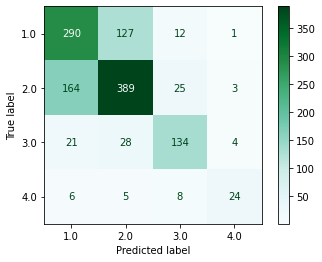

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test, y_pred_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_no_tuning, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(model_no_tuning, x_test, y_test, cmap='BuGn')

### 3.2.2 Árvore de Decisão - Construíndo um modelo com os melhores parametros possiveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Definindo os parâmetros para o randomSearch
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': range(1,50)
}

# Instanciando o modelo.
modelDT = DecisionTreeClassifier()

# Instanciando o modelo de busca 
searchDT = RandomizedSearchCV(
    estimator = modelDT,
    param_distributions = params
)

# Treinando o modelo de busca
modelTraining = searchDT.fit(x_train, y_train)

# Associando resultado.
y_pred = modelTraining.predict(x_test)

# Limpando o console de saída.
clear_output()

# Mostrando os melhores parâmetros
modelTraining.best_params_


{'random_state': 2,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

Análise dos resultados obtidos:

Acurácia: 68.01%
Precisão: 67.32%
Erro Quadrático: 40.45%
Recall: 59.20%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


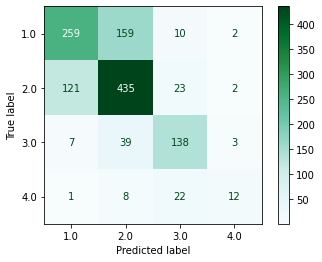

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(modelTraining, x_test, y_test, cmap='BuGn')


### 3.2.3 Análise da relevancia das features para o modelo:

In [ ]:
def get_relevance(table, model):

  # Instanciando uma lista para armazenar os itens de maior relevância.
  relevance_list = []

  # Adicionando cada item à lista instanciada.
  for feature, importance in zip(final_table.columns, model.best_estimator_.feature_importances_):
    relevance_list.append({'feature': feature, 'importance':importance*100})

  # Ordenando a lista criada de maneira decrescente.
  sorted_relevance_list = sorted(relevance_list, key=lambda d: d['importance'], reverse=True) 

  # Imprimindo na tela as features mais relevantes em ordem de importancia.
  for i in sorted_relevance_list:
    print('{}: {:.2f}%'.format(i.get('feature'), i.get('importance')))

# Recebendo a relevância de cada feature.
get_relevance(final_table, modelTraining)


time_with_tumor_delta: 50.86%
tumor_subtype: 6.14%
has_children: 5.43%
progesteron_percentage: 5.13%
menopause_status: 4.05%
ricidive_status: 3.95%
age_when_cancer_was_discovered_in_months: 3.83%
primary_diagnostic: 3.06%
mitotic_index: 2.99%
body_mass_index: 2.79%
alcohol: 2.21%
histological_grade_based_on_nottinghan: 2.14%
menarche_age: 2.05%
histological_grade: 1.22%
breastfed_time: 1.07%
has_breast_cancer_family_history: 0.72%
tobaco: 0.69%
tubular_differentiation: 0.49%
hormone_therapy_time: 0.44%
has_breastfed: 0.40%
hormone_therapy_status: 0.18%
is_benign: 0.16%
number_of_births: 0.00%
abortion: 0.00%


### 3.2.4 Visualizando a árvore de decisão criada



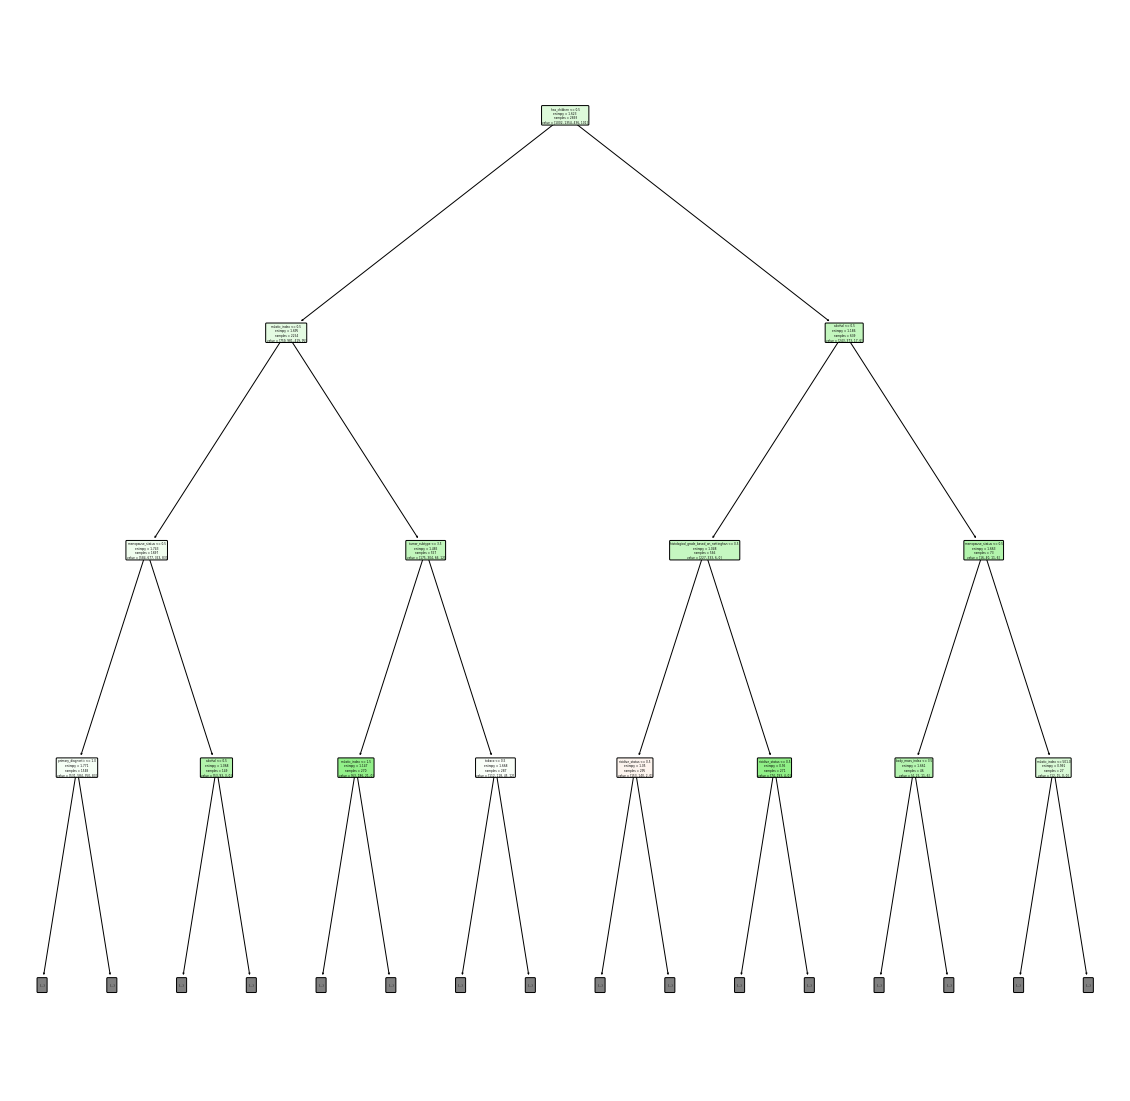

In [ ]:
# Ajustando aas configurações da figura.
fig, ax = plt.subplots(figsize=(20, 20))

# Gerando a imagem.
_ = plot_tree(modelTraining.best_estimator_, 
            feature_names=x.columns,
            class_names=None, 
            filled=True, rounded=True, ax=ax,
            max_depth = 3)

# Salvando a figura gerada.
fig.savefig('output.pdf')

## 3.3 kNN

###3.3.1 Separando a tabela para treino

In [ ]:
# Criando um dataframe com somente os dados de entrada.
xKNN = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
yKNN = final_table.loc[:, final_table.columns=='overall_survive']

### 3.3.2 KNN - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:





In [ ]:
# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(xKNN, yKNN, test_size=0.3, random_state=52)

# Instanciando o modelo.
kNN = KNeighborsClassifier()

# Treinando o modelo de busca
kNN.fit(x_train_KNN, y_train_KNN)

# Associando resultado.
y_pred_KNN_no_tuning = kNN.predict(x_test_KNN)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Acurácia: 72.52%
Precisão: 76.77%
Erro Quadrático: 38.76%
Recall: 69.25%
Segue a Matriz de Confusão: 


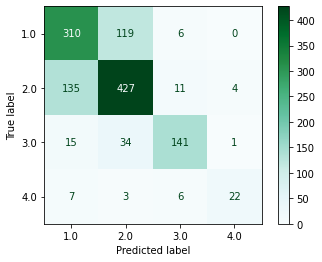

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_KNN, y_pred_KNN_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_KNN, y_pred_KNN_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_KNN, y_pred_KNN_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_KNN, y_pred_KNN_no_tuning, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(kNN, x_test_KNN, y_test_KNN, cmap='BuGn')

### 3.3.3 KNN - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:





In [ ]:
# Definindo os parâmetros para o randomSearch
params = {
    'n_neighbors': range(5,35),
    'weights': ['uniform', 'distance'],
}

# Instanciando o modelo de busca 

search = RandomizedSearchCV(
    estimator = kNN,
    param_distributions = params
)

# Treinando o modelo de busca
kNN_model1 = search.fit(x_train_KNN, y_train_KNN)

clear_output()

# Associando resultado.
y_pred_KNN = kNN_model1.predict(x_test_KNN)

# Mostrando os melhores parâmetros
kNN_model1.best_params_

{'weights': 'uniform', 'n_neighbors': 19}

Análise dos resultados obtidos:

Acurácia: 74.46%
Precisão: 77.92%
Erro Quadrático: 33.76%
Recall: 70.64%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


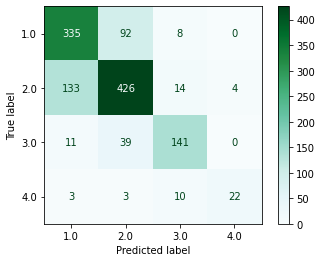

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_KNN, y_pred_KNN) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_KNN, y_pred_KNN, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_KNN, y_pred_KNN) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_KNN, y_pred_KNN, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(kNN_model1, x_test_KNN, y_test_KNN, cmap='BuGn')

## 3.4 Redes Neurais

### 3.4.1 Separando as tabelas para treino

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x_neural_network = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y_neural_network = final_table.loc[:, final_table.columns=='overall_survive']

###3.4.2 Redes Neurais - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_NN, x_test_NN, y_train_NN, y_test_NN = train_test_split(x_neural_network, y_neural_network, test_size=0.3, random_state=52)

# Instanciando o modelo.
NN = MLPClassifier()

# Treinando o modelo de busca
NN_model = NN.fit(x_train_NN, y_train_NN)

# Associando resultado.
y_pred_NN_no_tuning = NN_model.predict(x_test_NN)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 64.46%
Precisão: 56.36%
Erro Quadrático: 49.48%
Recall: 59.12%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


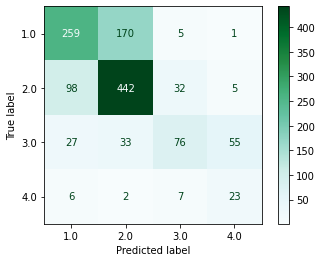

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_NN, y_pred_NN_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_NN, y_pred_NN_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_NN, y_pred_NN_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_NN, y_pred_NN_no_tuning, average='macro') * 100))

# Matirz de Confusão do modelo
NNMatrix = plot_confusion_matrix(NN_model, x_test_NN, y_test_NN, cmap='BuGn')

###3.4.3 Rede Neural - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Colocando parâmetros
params = {
   ## "hidden_layer_sizes": range(100, 800, 150),
    ##'max_iter': range(100, 1000, 100),
    'solver': ['lbfgs'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'] }

# Instanciando o modelo de busca 
search = RandomizedSearchCV(
    estimator = NN,
    param_distributions = params
)

# Treinando o modelo de busca
NN_model1 = search.fit(x_train_NN, y_train_NN)

# Associando resultado.
y_pred_NN = NN_model1.predict(x_test_NN)

# Limpando o console de saída.
clear_output()



Análise dos resultados obtidos:

Acurácia: 61.32%
Precisão: 54.70%
Erro Quadrático: 55.52%
Recall: 52.83%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


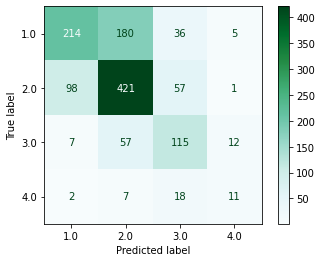

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_NN, y_pred_NN) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_NN, y_pred_NN, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_NN, y_pred_NN) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_NN, y_pred_NN, average='macro') * 100))

# Matirz de Confusão do modelo
NNMatrix = plot_confusion_matrix(NN_model1, x_test_NN, y_test_NN, cmap='BuGn')

##3.5 SVM


###3.5.1 SVM - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x_SVC = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y_SVC = final_table.loc[:, final_table.columns=='overall_survive']

# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = train_test_split(x_SVC, y_SVC, test_size=0.3, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(x_train_SVC, y_train_SVC)

y_pred_SVC_no_tuning = clf.predict(x_test_SVC)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 70.27%
Precisão: 59.18%
Erro Quadrático: 43.59%
Recall: 55.10%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


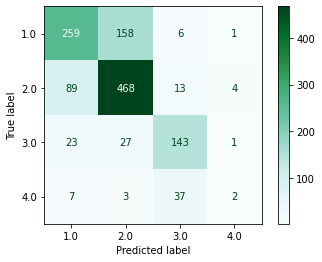

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_SVC, y_pred_SVC_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_SVC, y_pred_SVC_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_SVC, y_pred_SVC_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_SVC, y_pred_SVC_no_tuning, average='macro') * 100))

SVM_Matrix = plot_confusion_matrix(clf, x_test_SVC, y_test_SVC, cmap='BuGn')

###3.5.2 SVM - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
##print(clf.get_params())
params = {    'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__random_state': [None, 0, 42],
              'svc__probability': [True, False],
              'svc__kernel': ['linear', 'rbf', 'poly']} 

# Instanciando o modelo de busca 
search = RandomizedSearchCV(
    estimator = clf,
    param_distributions = params
)

SVM_model = search.fit(x_train_SVC, y_train_SVC)

y_pred_SVC = SVM_model.predict(x_test_SVC)


# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 70.67%
Precisão: 62.14%
Erro Quadrático: 44.80%
Recall: 58.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


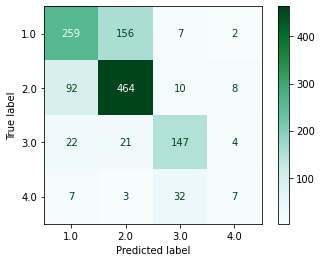

In [ ]:
  # Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_SVC, y_pred_SVC) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_SVC, y_pred_SVC, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_SVC, y_pred_SVC) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_SVC, y_pred_SVC, average='macro') * 100))

SVM_Matrix = plot_confusion_matrix(SVM_model, x_test_SVC, y_test_SVC, cmap='BuGn')

## 3.6 Comparando o desempenho dos modelos

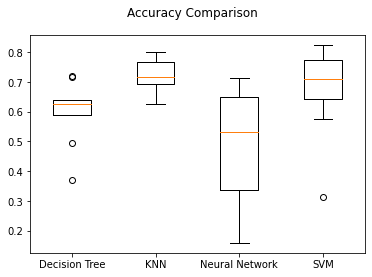

In [ ]:
from sklearn import model_selection

models = [('Decision Tree', modelTraining.best_estimator_), ('KNN', kNN_model1.best_estimator_), ('Neural Network', NN_model1.best_estimator_), ('SVM', SVM_model.best_estimator_)]

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

clear_output()

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.6.1 Acurácia obtida entre os modelos

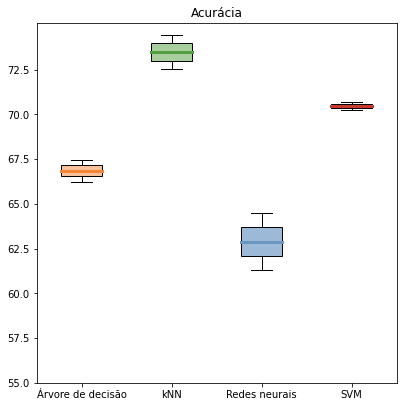

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [(accuracy_score(y_test, y_pred_no_tuning) * 100), (accuracy_score(y_test, y_pred) * 100)]

# kNN
data_2 = [(accuracy_score(y_test_KNN, y_pred_KNN_no_tuning) * 100), (accuracy_score(y_test_KNN, y_pred_KNN) * 100)]

# Neural Network
data_3 = [(accuracy_score(y_test_NN, y_pred_NN_no_tuning) * 100), (accuracy_score(y_test_NN, y_pred_NN) * 100)]

# SVM
data_4 = [(accuracy_score(y_test_SVC, y_pred_SVC_no_tuning) * 100), (accuracy_score(y_test_SVC, y_pred_SVC) * 100)]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','kNN','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("Acurácia")

plt.yticks(np.arange(55, 75, 2.5))
 
# Showing plot
plt.show()

### 3.6.2 Precisão encontrada entre modelos


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


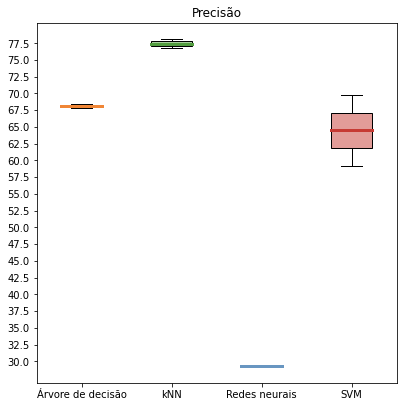

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [68.46, 67.87]

# kNN
data_2 = [76.77, 78.09]

# Neural Network
data_3 = [29.23] # faltam dados aqui

# SVM
data_4 = [59.18, 69.74]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','kNN','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("Precisão")

plt.yticks(np.arange(30, 80, 2.5))
 
# Showing plot
plt.show()

### 3.6.3 Erro quadrático apresentado pelos modelos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


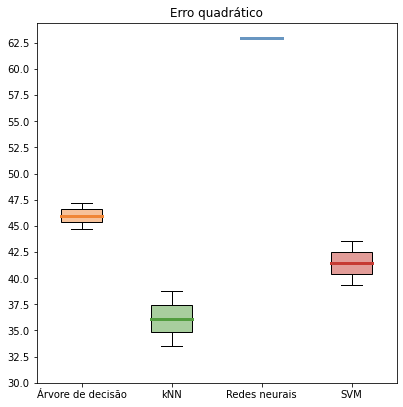

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [47.22, 44.72]

# kNN
data_2 = [38.76, 33.52]

# Neural Network
data_3 = [62.93] # faltam dados aqui

# SVM
data_4 = [43.59, 39.32]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','kNN','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("Erro quadrático")

plt.yticks(np.arange(30, 65, 2.5))
 
# Showing plot
plt.show()

### 3.6.4 Recall

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


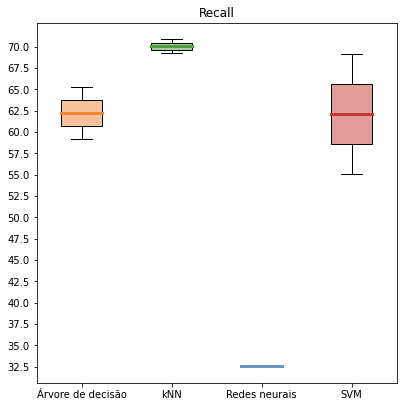

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [65.21, 59.16]

# kNN
data_2 = [69.25, 70.87]

# Neural Network
data_3 = [32.54] # faltam dados aqui

# SVM
data_4 = [55.10, 69.15]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','kNN','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("Recall")

plt.yticks(np.arange(32.5, 72.5, 2.5))
 
# Showing plot
plt.show()

### 3.6.5 Valores obtidos com a Árvore de Decisão


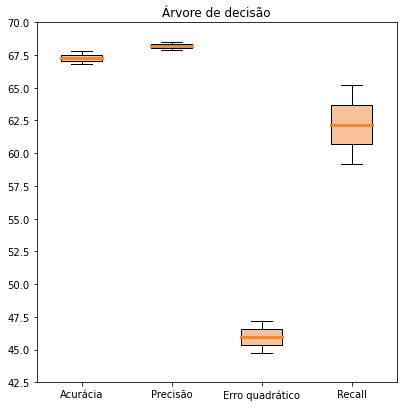

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [66.80, 67.77]

# Precisão
data_2 = [68.46, 67.87]

# Erro quadrático
data_3 = [47.22, 44.72] # faltam dados aqui

# Recall
data_4 = [65.21, 59.16]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#f7c29a',
          '#f7c29a', '#f7c29a']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#f08636',linewidth = 3)

bp['medians'][2].set(color ='#f08636',linewidth = 3)

bp['medians'][3].set(color ='#f08636',linewidth = 3)
     

plt.title("Árvore de decisão")

plt.yticks(np.arange(42.5, 72.5, 2.5))
 
# Showing plot
plt.show()

### 3.6.6 Valores obtidos com o KNN

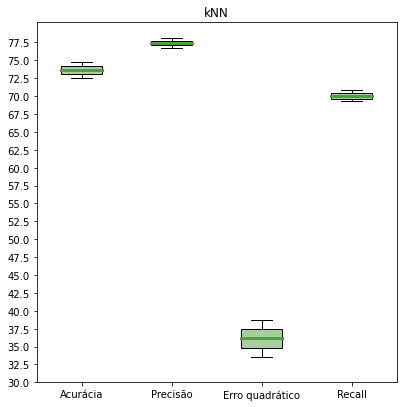

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [74.7, 72.52]

# Precisão
data_2 = [78.09, 76.77]

# Erro quadrático
data_3 = [33.52, 38.76] # faltam dados aqui

# Recall
data_4 = [70.87, 69.25]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#a8ce9e', '#a8ce9e',
          '#a8ce9e', '#a8ce9e']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#529d3f',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#529d3f',linewidth = 3)

bp['medians'][3].set(color ='#529d3f',linewidth = 3)
     

plt.title("kNN")

plt.yticks(np.arange(30, 80, 2.5))
 
# Showing plot
plt.show()

### 3.6.7 Valores obtidos com as Redes Neurais


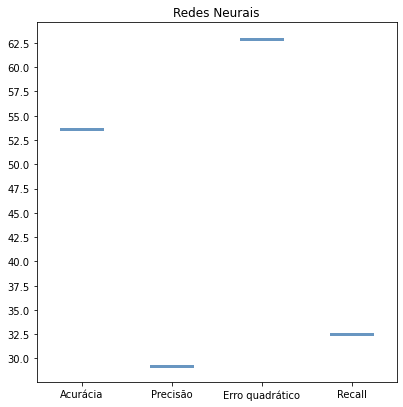

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [53.67] # faltam dados aqui

# Precisão
data_2 = [29.23] # faltam dados aqui

# Erro quadrático
data_3 = [62.93] # faltam dados aqui

# Recall
data_4 = [32.54] # faltam dados aqui

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#9cbad7', '#9cbad7',
          '#9cbad7', '#9cbad7']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#6896c1',linewidth = 3)

bp['medians'][1].set(color ='#6896c1',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#6896c1',linewidth = 3)
     

plt.title("Redes Neurais")

plt.yticks(np.arange(30, 65, 2.5))
 
# Showing plot
plt.show()

### 3.6.8 Valores obtidos com o SVM

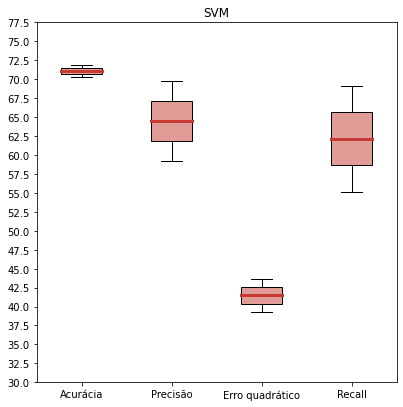

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [71.88, 70.27] # faltam dados aqui

# Precisão
data_2 = [69.74, 59.18] # faltam dados aqui

# Erro quadrático
data_3 = [39.32, 43.59] # faltam dados aqui

# Recall
data_4 = [69.15, 55.10] # faltam dados aqui

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#e29c98', '#e29c98',
          '#e29c98', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#c63a33',linewidth = 3)

bp['medians'][1].set(color ='#c63a33',linewidth = 3)

bp['medians'][2].set(color ='#c63a33',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("SVM")

plt.yticks(np.arange(30, 80, 2.5))
 
# Showing plot
plt.show()